In [10]:
import matplotlib.pyplot as plt
from pprint import pprint
import MEArec as mr

In [3]:
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.curation as scur
import spikeinterface.widgets as sw


In [4]:
global_job_kwargs = dict(n_jobs=4, chunk_duration="1s")
si.set_global_job_kwargs(**global_job_kwargs)

In [ ]:
# Check if cell models folder exists
cell_models_folder = mr.get_default_cell_models_folder()
print(f"Cell models folder: {cell_models_folder}")

Cell models folder: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp


In [ ]:
# Try to load existing templates first
try:
    tempgen = mr.load_templates('templates.h5')
    print("Loaded existing templates")
except:
    print("No existing templates found. Need to generate new ones.")

No existing templates found. Need to generate new ones.


In [ ]:
# Get default parameters and modify minimally
templates_params = mr.get_default_templates_params()
templates_params['probe'] = 'tetrode'
templates_params['n'] = 5  # Start with fewer cells
templates_params['seed'] = 0

# Try with verbose output to see what's happening
try:
    cell_models_folder = mr.get_default_cell_models_folder()
    tempgen = mr.gen_templates(
        cell_models_folder=cell_models_folder,
        params=templates_params,
        verbose=True
    )
    mr.save_template_generator(tempgen, 'templates.h5')
    print("Success!")
except Exception as e:
    print(f"Error: {e}")
    print("Try using CLI: mearec gen-templates")

Setting n_jobs to 10 CPUs
Running with 10 jobs


Starting simulation 1/13 - cell: L5_BP_bAC217_1

Starting simulation 5/13 - cell: L5_LBC_bAC217_1

Starting simulation 4/13 - cell: L5_DBC_bAC217_1

Starting simulation 2/13 - cell: L5_BTC_bAC217_1

Starting simulation 9/13 - cell: L5_SBC_bNAC219_1

Starting simulation 7/13 - cell: L5_NBC_bAC217_1

Starting simulation 8/13 - cell: L5_NGC_bNAC219_1

Starting simulation 10/13 - cell: L5_STPC_cADpyr232_1

Starting simulation 3/13 - cell: L5_ChC_cACint209_1

Starting simulation 6/13 - cell: L5_MC_bAC217_1

Intracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_BTC_bAC217_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_BTC_bAC217_1
Intracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_NBC_bAC217_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /Users/eashanmonga/.config/mearec/1.

In [7]:
# Use simpler parameters that don't require complex cell models
templates_params = mr.get_default_templates_params()
templates_params['probe'] = 'tetrode'
templates_params['n'] = 5
templates_params['cell_types'] = ['simple']  # Use simple cell types

try:
    cell_models_folder = mr.get_default_cell_models_folder()
    tempgen = mr.gen_templates(
        cell_models_folder=cell_models_folder,
        params=templates_params,
        verbose=True
    )
    mr.save_template_generator(tempgen, 'templates.h5')
    print("Success with simple cell types!")
except Exception as e:
    print(f"Error: {e}")


Setting n_jobs to 10 CPUs
Running with 10 jobs
Starting simulation 1/13 - cell: L5_BP_bAC217_1

Starting simulation 2/13 - cell: L5_BTC_bAC217_1

Starting simulation 3/13 - cell: L5_ChC_cACint209_1

Starting simulation 4/13 - cell: L5_DBC_bAC217_1

Starting simulation 5/13 - cell: L5_LBC_bAC217_1

Starting simulation 6/13 - cell: L5_MC_bAC217_1

Starting simulation 7/13 - cell: L5_NBC_bAC217_1

Starting simulation 8/13 - cell: L5_NGC_bNAC219_1

Starting simulation 9/13 - cell: L5_SBC_bNAC219_1

Starting simulation 10/13 - cell: L5_STPC_cADpyr232_1

Intracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_BP_bAC217_1
Intracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_NGC_bNAC219_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_NGC_bNAC219_1



Cell has already be simulated. Using stored membrane currents



Extracellular 

In [ ]:

# Load the generated templates
tempgen = mr.load_templates('/Users/eashanmonga/.config/mearec/1.9.2/templates/physrot/templates_5_tetrode_02-06-2025_02-36.h5')

# Generate recordings with fewer spike trains
recordings_params = mr.get_default_recordings_params()
recordings_params['spiketrains']['n_exc'] = 3  # Reduced from 5
recordings_params['spiketrains']['n_inh'] = 2  # Reduced from 5
recordings_params['spiketrains']['duration'] = 60
recordings_params['recordings']['noise_level'] = 10

recgen = mr.gen_recordings(
    tempgen=tempgen,
    params=recordings_params,
)

# Save recordings
mr.save_recording_generator(recgen, 'recordings.h5')

Spiketrains seed:  2486
dtype float32
Noise Level  10
Templates selection seed:  5129
Selecting cells
Padding template edges
Elapsed pad time: 0.00553584098815918
Creating time jittering
Elapsed jitter time: 0.006508827209472656
Smoothing templates
Computing spike train SNR
Adding spiketrain annotations
Convolution seed:  5000
Electrode modulaton
Adding noise
Noise seed:  9703
Filtering
Band-pass cutoff [ 300. 6000.] Hz
Elapsed time:  0.4793168339965632
Deleted /var/folders/5w/gj94wfqd7mg6xbx29r02m2140000gp/T/tmpj_wksq7s


Deleted /var/folders/5w/gj94wfqd7mg6xbx29r02m2140000gp/T/tmpy_e9_d26
Recording shape: (1920000, 4)
Number of templates: 65
Sampling rate: 32000.0 Hz
Duration: 60.0 seconds


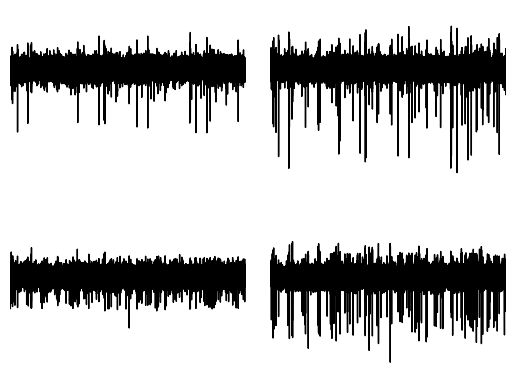

Deleted /var/folders/5w/gj94wfqd7mg6xbx29r02m2140000gp/T/tmpjlaknuj7
Deleted /var/folders/5w/gj94wfqd7mg6xbx29r02m2140000gp/T/tmpi2degqv6
Deleted /var/folders/5w/gj94wfqd7mg6xbx29r02m2140000gp/T/tmp05s3uirr
Deleted /var/folders/5w/gj94wfqd7mg6xbx29r02m2140000gp/T/tmp7vqi8_p1


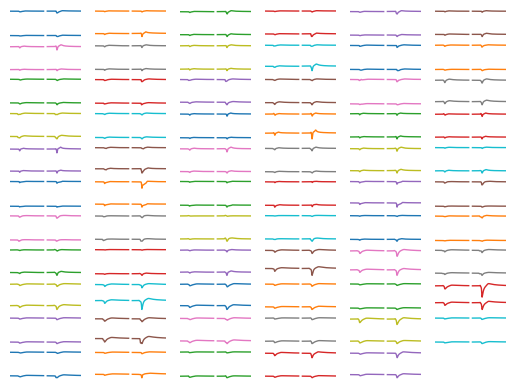

Number of neurons: 5
Neuron 0: 247 spikes
Neuron 1: 321 spikes
Neuron 2: 338 spikes
Neuron 3: 622 spikes
Neuron 4: 812 spikes


In [18]:
import matplotlib.pyplot as plt

# Load your generated data
tempgen = mr.load_templates('/Users/eashanmonga/.config/mearec/1.9.2/templates/physrot/templates_5_tetrode_02-06-2025_02-36.h5')
recgen = mr.load_recordings('recordings.h5')

# Inspect the data
print(f"Recording shape: {recgen.recordings.shape}")
print(f"Number of templates: {tempgen.templates.shape[0]}")
print(f"Sampling rate: {recgen.info['recordings']['fs']} Hz")
print(f"Duration: {recgen.info['recordings']['duration']} seconds")

# Plot the recordings
mr.plot_recordings(recgen, start_time=0, end_time=2)  # Plot first 2 seconds
plt.show()

# Plot templates
mr.plot_templates(tempgen)
plt.show()

# Access ground truth spike times
spike_times = recgen.spiketrains
print(f"Number of neurons: {len(spike_times)}")
for i, spikes in enumerate(spike_times):
    print(f"Neuron {i}: {len(spikes)} spikes")


In [19]:
# Load your generated MEArec data
recording, sorting_true = se.read_mearec('recordings.h5')

print(recording)
print(sorting_true)


MEArecRecordingExtractor: 4 channels - 32.0kHz - 1 segments - 1,920,000 samples 
                          60.00s (1.00 minutes) - float32 dtype - 29.30 MiB
  file_path: /Users/eashanmonga/PycharmProjects/STATS320_FinalProject/recordings.h5
MEArecSortingExtractor: 5 units - 1 segments - 32.0kHz
  file_path: /Users/eashanmonga/PycharmProjects/STATS320_FinalProject/recordings.h5


Channel ids: ['1' '2' '3' '4']
Sampling frequency: 32000.0
Number of channels: 4
Number of segments: 1
Unit ids: ['#0' '#1' '#2' '#3' '#4']
Spike train of first unit: [   5690    5874   10137   16593   17754   25651   26730   27604   29265
   32469   40275   42270   57301   64377   70920   81057   82668   93882
   98632  106125  107328  110689  110758  113854  120055  145969  153704
  154228  160706  161070  161767  166866  181215  183518  190273  198675
  211663  231429  234636  237472  239140  246457  250905  254249  256734
  256852  263992  267357  275006  284133  284966  304428  305316  309168
  341028  357700  358898  368541  385131  389324  389965  394096  394745
  396345  409691  413504  443012  454853  456499  460237  468270  468347
  476418  479829  493177  514834  515654  519370  524079  531320  540018
  541948  560206  567244  568817  573741  578481  588877  593478  643572
  661276  664249  666107  673848  675216  678523  685876  695905  710232
  710878  725098  738210  7389

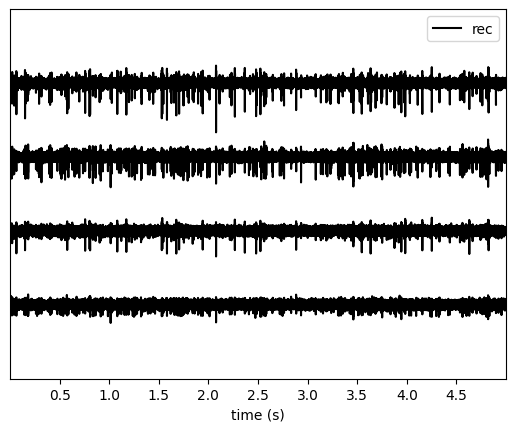

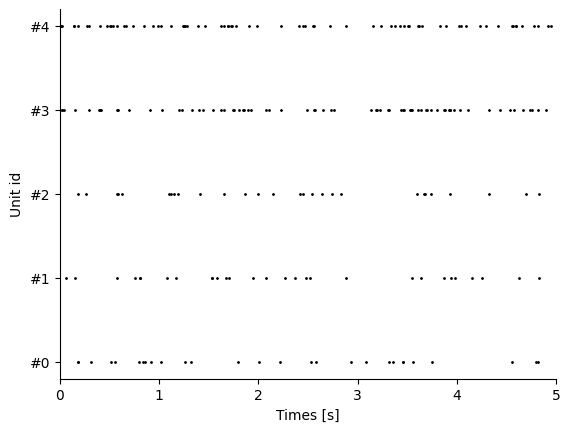

In [20]:
# Visualize traces and raster plots
w_ts = sw.plot_traces(recording, time_range=(0, 5))
w_rs = sw.plot_rasters(sorting_true, time_range=(0, 5))

# Get recording information
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_seg = recording.get_num_segments()

print("Channel ids:", channel_ids)
print("Sampling frequency:", fs)
print("Number of channels:", num_chan)
print("Number of segments:", num_seg)

# Get sorting information
unit_ids = sorting_true.get_unit_ids()
spike_train = sorting_true.get_unit_spike_train(unit_id=unit_ids[0])

print("Unit ids:", unit_ids)
print("Spike train of first unit:", spike_train)


Probe - 4ch - 1shanks


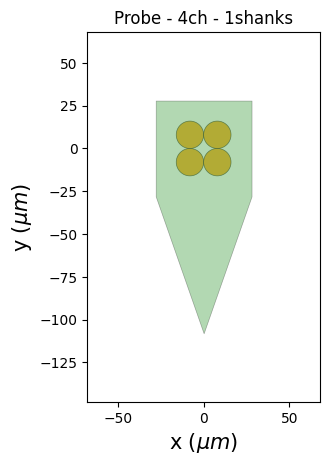

In [21]:
# Check probe information
probe = recording.get_probe()
print(probe)

from probeinterface.plotting import plot_probe
_ = plot_probe(probe)
plt.show()


In [22]:
# Apply preprocessing (your MEArec data is already filtered, but we can apply additional steps)
recording_f = spre.bandpass_filter(recording, freq_min=300, freq_max=6000)
recording_cmr = spre.common_reference(recording_f, reference="global", operator="median")

# Save preprocessed recording
recording_preprocessed = recording_cmr.save(format="binary")
print(recording_preprocessed)


Use cache_folder=/var/folders/5w/gj94wfqd7mg6xbx29r02m2140000gp/T/spikeinterface_cache/tmpxjurrfhr/0C61H8N1
write_binary_recording 
engine=process - n_jobs=4 - samples_per_chunk=32,000 - chunk_memory=500.00 KiB - total_memory=1.95 MiB - chunk_duration=1.00s


write_binary_recording (workers: 4 processes):   0%|          | 0/60 [00:00<?, ?it/s]

BinaryFolderRecording: 4 channels - 32.0kHz - 1 segments - 1,920,000 samples 
                       60.00s (1.00 minutes) - float32 dtype - 29.30 MiB


In [23]:
print("Available sorters:", ss.available_sorters())
print("Installed sorters:", ss.installed_sorters())

Available sorters: ['combinato', 'hdsort', 'herdingspikes', 'ironclust', 'kilosort', 'kilosort2', 'kilosort2_5', 'kilosort3', 'kilosort4', 'klusta', 'mountainsort4', 'mountainsort5', 'pykilosort', 'simple', 'spykingcircus', 'spykingcircus2', 'tridesclous', 'tridesclous2', 'waveclus', 'waveclus_snippets', 'yass']
Installed sorters: ['simple', 'spykingcircus2', 'tridesclous2']


In [51]:
# Check parameters for a sorter
if 'tridesclous' in ss.installed_sorters():
    print("Tridesclous params:")
    pprint(ss.get_default_sorter_params("tridesclous"))
    
    # Run Tridesclous
    sorting_TDC = ss.run_sorter(
        sorter_name="tridesclous", 
        recording=recording_preprocessed, 
        detect_threshold=4
    )
    print(sorting_TDC)

# If SpykingCircus2 is available
if 'spykingcircus2' in ss.installed_sorters():
    sorting_SC2 = ss.run_sorter(
        sorter_name="spykingcircus2", 
        recording=recording_preprocessed,
        remove_existing_folder=True,
        folder='sorting_output/spykingcircus2',
    )
    print(sorting_SC2)

/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/easha

NumpyFolder (NumpyFolderSorting): 7 units - 1 segments - 32.0kHz


/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/spikeinterface/core/sortinganalyzer.py:431: UserWarning: The Recording is not serializable! The recording link will be lost for future load
  warnings.warn("The Recording is not serializable! The recording link will be lost for future load")


In [46]:
# Create SortingAnalyzer (using the first sorter result)
analyzer = si.create_sorting_analyzer(
    sorting=sorting_SC2, 
    recording=recording_preprocessed, 
    format='binary_folder', 
    folder='analyzer_binary',
    overwrite=True
)

# Compute multiple extensions at once
extensions_to_compute = [
    "random_spikes",
    "waveforms", 
    "noise_levels",
    "templates",
    "spike_amplitudes",
    "unit_locations",
    "spike_locations",
    "correlograms",
    "template_similarity"
]

extension_params = {
    "unit_locations": {"method": "center_of_mass"},
    "spike_locations": {"ms_before": 0.1},
    "correlograms": {"bin_ms": 0.1},
    "template_similarity": {"method": "cosine_similarity"}
}

analyzer.compute(extensions_to_compute, extension_params=extension_params)

estimate_sparsity (workers: 4 processes):   0%|          | 0/60 [00:00<?, ?it/s]

/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/spikeinterface/core/basesorting.py:261: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


compute_waveforms (workers: 4 processes):   0%|          | 0/60 [00:00<?, ?it/s]

Compute : spike_amplitudes + spike_locations (workers: 4 processes):   0%|          | 0/60 [00:00<?, ?it/s]

In [47]:
# Compute quality metrics
qm_params = sqm.get_default_qm_params()

# Adjust parameters for your recording duration
qm_params["presence_ratio"]["bin_duration_s"] = 10  # Adjust based on your recording length
qm_params["amplitude_cutoff"]["num_histogram_bins"] = 10
qm_params["drift"]["interval_s"] = 10
qm_params["drift"]["min_spikes_per_interval"] = 5

analyzer.compute("quality_metrics", qm_params)
qm_data = analyzer.get_extension("quality_metrics").get_data()
print(qm_data)


   num_spikes  firing_rate  presence_ratio        snr  isi_violations_ratio  \
0        7656   127.600000             1.0   3.634399              0.503290   
1        7916   131.933333             1.0   3.623008              0.503008   
4         261     4.350000             1.0   4.838031              0.293595   
5        5953    99.216667             1.0   3.686825              0.514699   
6        1110    18.500000             1.0   6.986649              0.194789   
7         315     5.250000             1.0  11.122764              0.000000   
8        6950   115.833333             1.0   3.695906              0.480720   
9         450     7.500000             1.0   5.544175              0.000000   

   isi_violations_count  rp_contamination  rp_violations  \
0                1475.0          1.000000         1146.0   
1                1576.0          1.000000         1151.0   
4                   1.0          0.654726            1.0   
5                 912.0          1.000000       

/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:910: UserWarning: Some units have too few spikes : amplitude_cutoff is set to NaN
  warnings.warn(f"Some units have too few spikes : amplitude_cutoff is set to NaN")
/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:1066: UserWarning: The recording is too short given the specified 'interval_s' and 'min_num_bins'. Drift metrics will be set to NaN
  warnings.warn(


/Users/eashanmonga/PycharmProjects/STATS320_FinalProject/.venv/lib/python3.12/site-packages/spikeinterface/widgets/metrics.py:66: UserWarning: Skipping ['drift_ptp', 'drift_std', 'drift_mad'] because they contain all NaNs
  warnings.warn(f"Skipping {nan_metrics} because they contain all NaNs")


Plotting individual components...


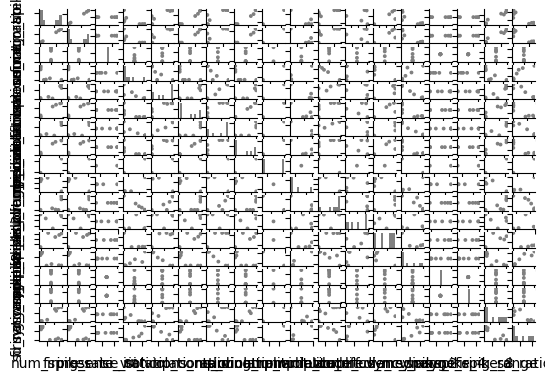

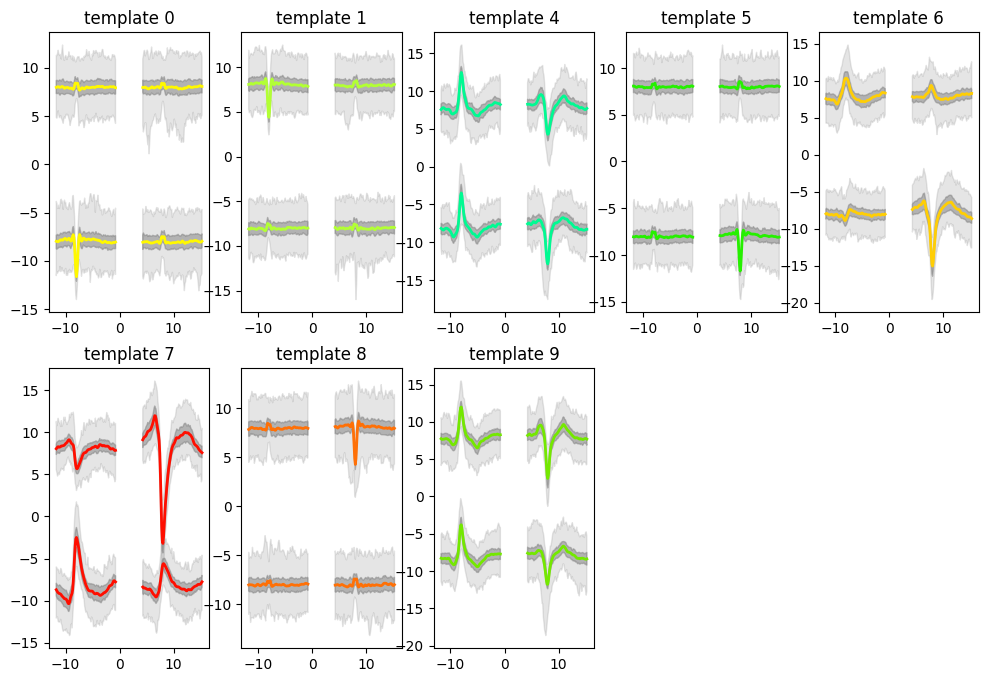

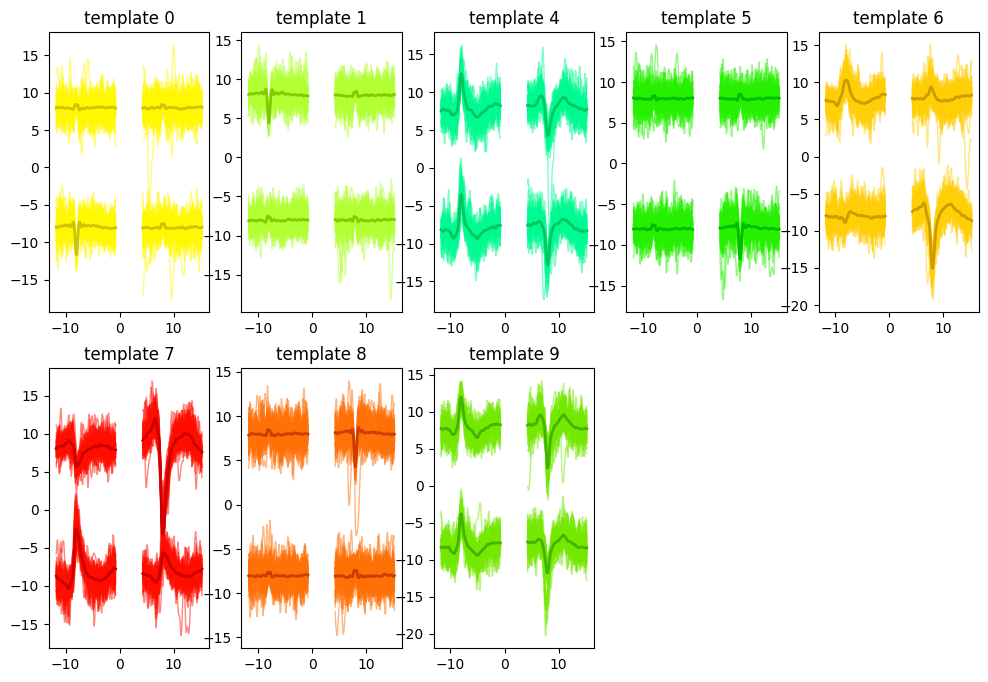

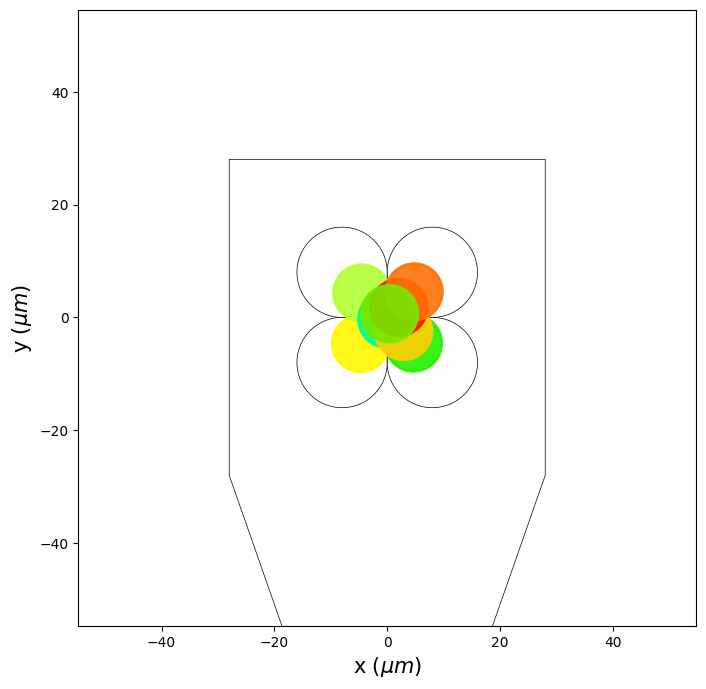

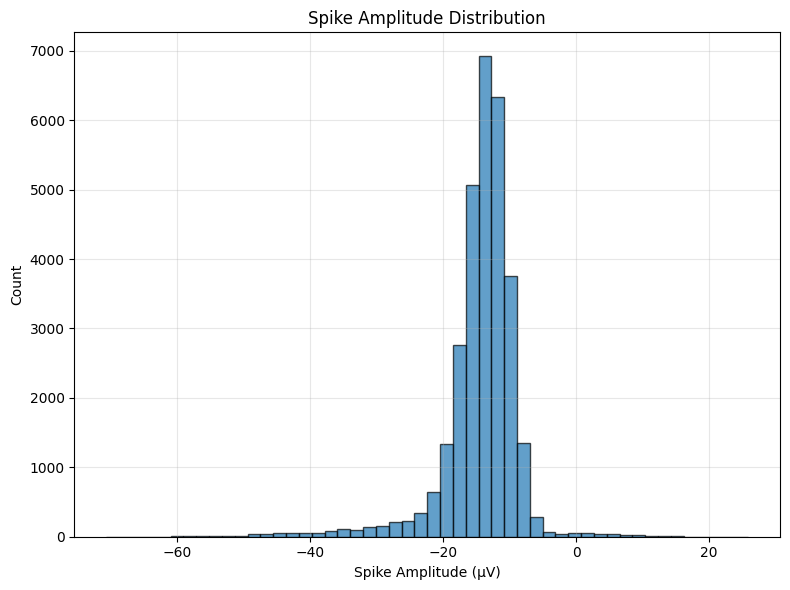

In [48]:

# Plot quality metrics (works with matplotlib)
w1 = sw.plot_quality_metrics(analyzer)

# Skip sorting summary and use individual plots instead
print("Plotting individual components...")

# Plot unit templates
w_templates = sw.plot_unit_templates(analyzer, figsize=(12, 8))

# Plot unit waveforms
w_waveforms = sw.plot_unit_waveforms(analyzer, figsize=(12, 8))

# Plot unit locations if available
try:
    w_locations = sw.plot_unit_locations(analyzer, figsize=(8, 8))
except:
    print("Unit locations not available")

# Plot spike amplitudes histogram
amplitudes = analyzer.get_extension("spike_amplitudes").get_data()
plt.figure(figsize=(8, 6))
plt.hist(amplitudes, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Spike Amplitude (µV)')
plt.ylabel('Count')
plt.title('Spike Amplitude Distribution')
plt.grid(True, alpha=0.3)

# Show all plots
plt.tight_layout()
plt.show()

Sorting Performance:
            accuracy    recall precision false_discovery_rate miss_rate
gt_unit_id                                                             
#0                 0         0         0                    0         0
#1          0.981308  0.981308       1.0                  0.0  0.018692
#2                 0         0         0                    0         0
#3          0.590504  0.639871  0.884444             0.115556  0.360129
#4          0.693392  0.969212  0.709009             0.290991  0.030788


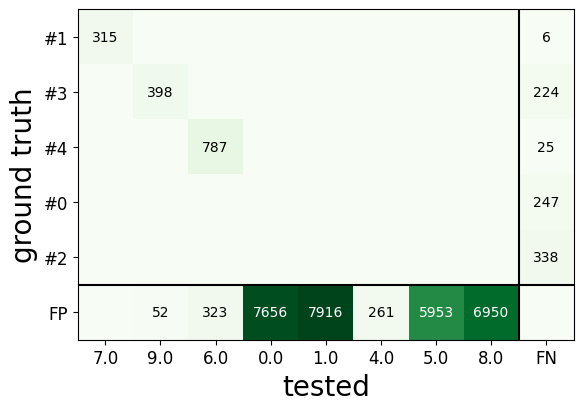

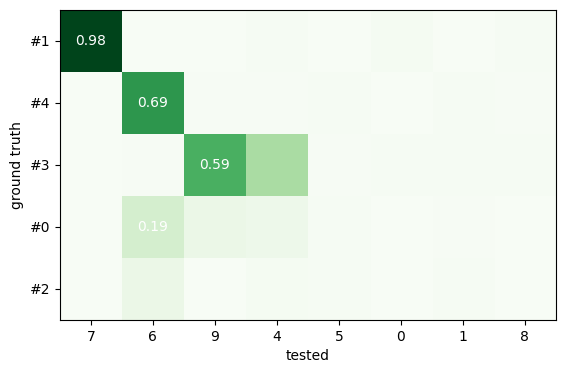

In [49]:
# Compare your spike sorting results with ground truth
comp_gt = sc.compare_sorter_to_ground_truth(
    gt_sorting=sorting_true, 
    tested_sorting=sorting_SC2
)

# Get performance metrics
performance = comp_gt.get_performance()
print("Sorting Performance:")
print(performance)

# Plot confusion matrix
w_conf = sw.plot_confusion_matrix(comp_gt)
w_agr = sw.plot_agreement_matrix(comp_gt)

In [52]:
# Example: Run Kilosort3 via Docker
sorting_MS5 = ss.run_sorter(
    sorter_name="mountainsort5", 
    recording=recording,
    remove_existing_folder=True,
    folder='sorting_output/mountainsort5' 
)


write_binary_recording 
engine=process - n_jobs=4 - samples_per_chunk=32,000 - chunk_memory=500.00 KiB - total_memory=1.95 MiB - chunk_duration=1.00s
Using training recording of duration 300 sec with the sampling mode uniform
*** MS5 Elapsed time for SCHEME2 get_sampled_recording_for_training: 0.000 seconds ***
Running phase 1 sorting
Number of channels: 4
Number of timepoints: 1920000
Sampling frequency: 32000.0 Hz
Channel 0: [-8. -8.]
Channel 1: [-8.  8.]
Channel 2: [ 8. -8.]
Channel 3: [8. 8.]
Loading traces
*** MS5 Elapsed time for load_traces: 0.002 seconds ***
Detecting spikes

Adjacency for detect spikes with channel radius 200
[[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]

m = 0 (nbhd size: 4)
m = 1 (nbhd size: 4)
m = 2 (nbhd size: 4)
m = 3 (nbhd size: 4)
Detected 1732 spikes
*** MS5 Elapsed time for detect_spikes: 0.039 seconds ***
Removing duplicate times
*** MS5 Elapsed time for remove_duplicate_times: 0.000 seconds ***
Extracting 1732 snippets
*** MS5 Elapsed tim

In [36]:
(ss.installed_sorters())

['mountainsort5', 'simple', 'spykingcircus2', 'tridesclous2']

Sorting Performance:
            accuracy    recall precision false_discovery_rate miss_rate
gt_unit_id                                                             
#0          0.909449  0.935223  0.970588             0.029412  0.064777
#1          0.996885  0.996885       1.0                  0.0  0.003115
#2                 0         0         0                    0         0
#3            0.9616  0.966238  0.995033             0.004967  0.033762
#4          0.687577  0.688424  0.998214             0.001786  0.311576


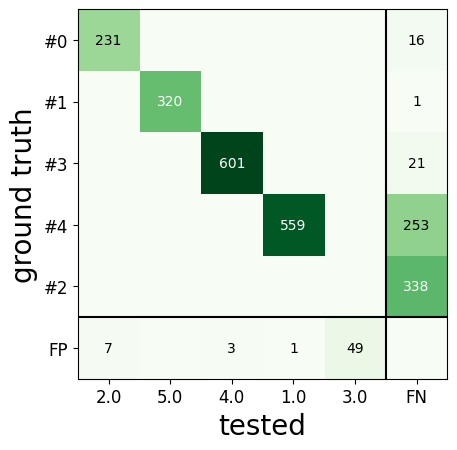

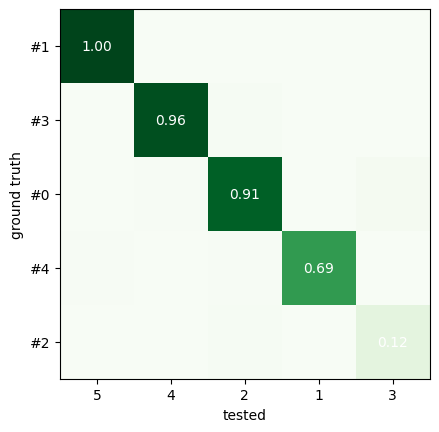

In [39]:
# Compare your spike sorting results with ground truth
comp_gt = sc.compare_sorter_to_ground_truth(
    gt_sorting=sorting_true, 
    tested_sorting=sorting_MS5
)

# Get performance metrics
performance = comp_gt.get_performance()
print("Sorting Performance:")
print(performance)

# Plot confusion matrix
w_conf = sw.plot_confusion_matrix(comp_gt)
w_agr = sw.plot_agreement_matrix(comp_gt)

In [41]:
help(ss.run_sorter)

Help on function run_sorter in module spikeinterface.sorters.runsorter:

run_sorter(sorter_name: 'str', recording: 'BaseRecording', folder: 'Optional[str]' = None, remove_existing_folder: 'bool' = False, delete_output_folder: 'bool' = False, verbose: 'bool' = False, raise_error: 'bool' = True, docker_image: 'Optional[Union[bool, str]]' = False, singularity_image: 'Optional[Union[bool, str]]' = False, delete_container_files: 'bool' = True, with_output: 'bool' = True, output_folder: 'None' = None, **sorter_params)
    Generic function to run a sorter via function approach.


    Parameters
    ----------
    sorter_name : str
        The sorter name
    recording : RecordingExtractor
        The recording extractor to be spike sorted
    folder : str or Path
        Path to output folder
    remove_existing_folder : bool
        If True and folder exists then delete.
    delete_output_folder : bool, default: False
        If True, output folder is deleted
    verbose : bool, default: Fal